# Smart Systems Assignment 1
[github](https://github.com/Bryanhon/Smart-Systems-Assignment-1)



## Import all the libraries

In [1]:
%matplotlib inline
import datetime
import subprocess, psycopg2
import seaborn           as sns
import statsmodels.api   as sm
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
from dateutil.relativedelta    import relativedelta
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal  import seasonal_decompose
from sqlalchemy                import create_engine

## connect to the heroku postgresql database and get all the data

In [2]:
HEROKU_APP_NAME = "pxl-ss"
TABLE_NAME = "Temperature"

conn_info = subprocess.run(["heroku", "config:get", "DATABASE_URL", "-a", HEROKU_APP_NAME], stdout = subprocess.PIPE)
connuri = conn_info.stdout.decode('utf-8').strip()

engine = create_engine(connuri)
raw_engine = engine.raw_connection()

my_df = pd.read_sql_query("SELECT * FROM Temperature;", raw_engine)
# I only care about the date and the value so we can get rid of the id and place column
my_df = my_df.drop(["id", "place"], axis=1)

In [3]:
my_df = my_df.set_index(['creation_date'])
my_df.index.name=None

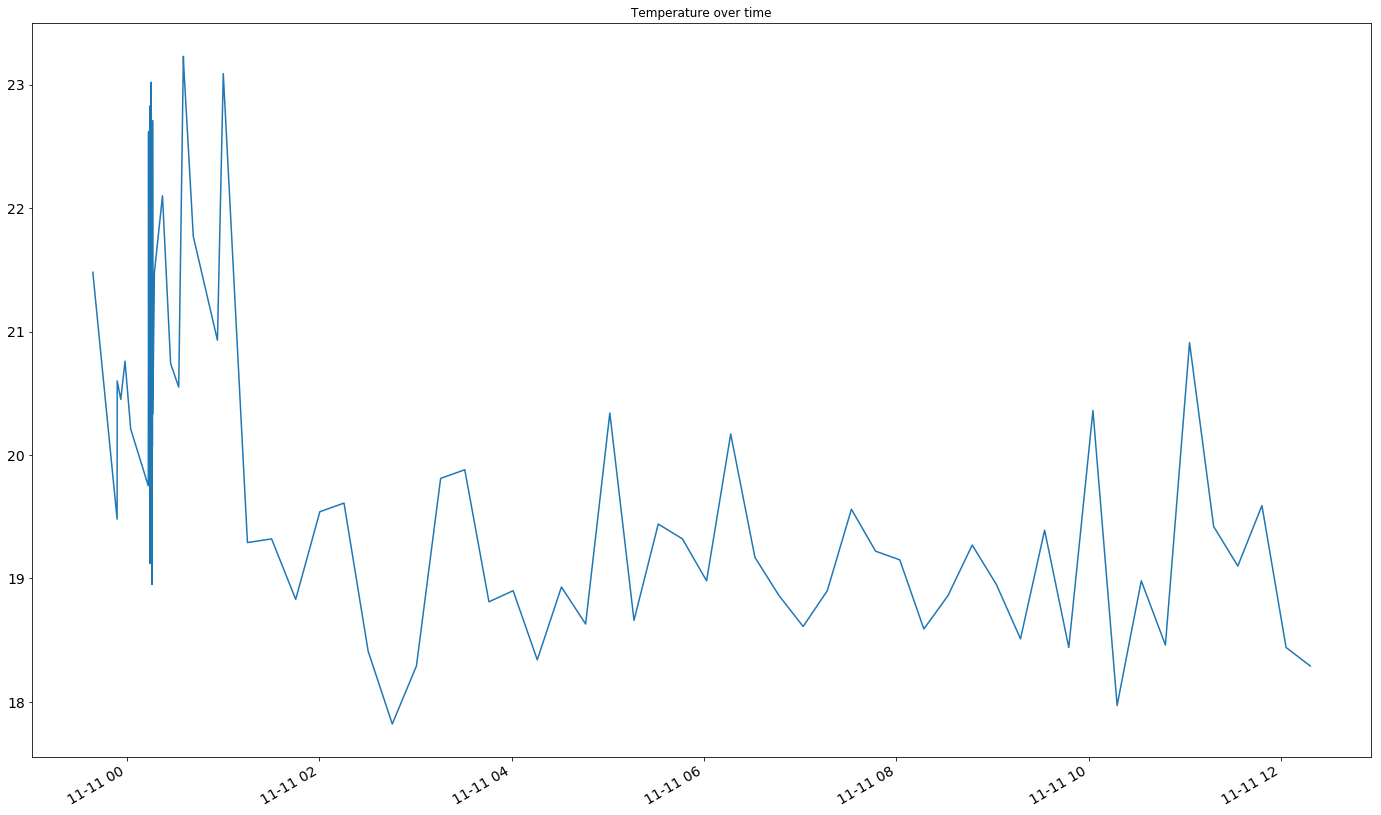

In [9]:
my_df.columns = ['value']
my_df = my_df.astype(float)
my_df.value.plot(figsize=(24,15), title= 'Temperature over time', fontsize=14)

<Figure size 432x288 with 0 Axes>

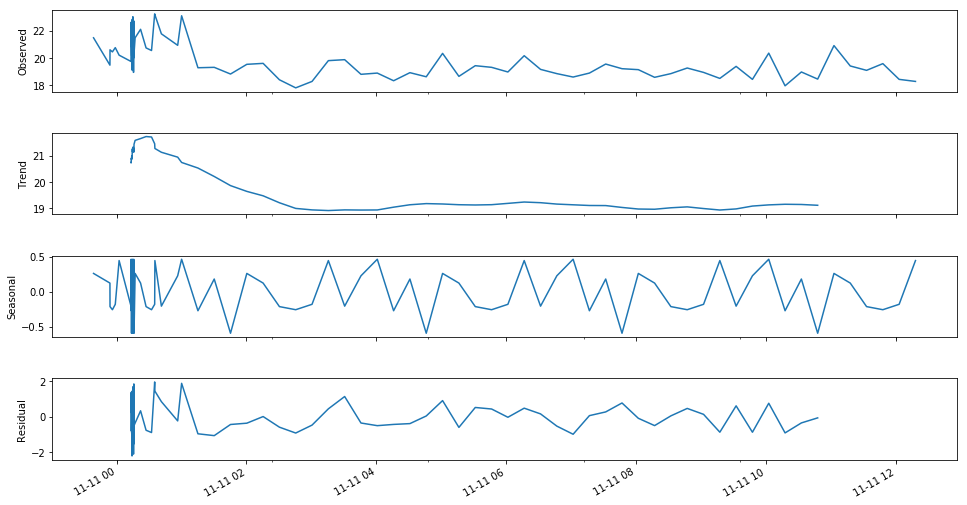

In [5]:
decomposition = seasonal_decompose(my_df.value, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)